## Chapter 16
### 03 데이터 증강 p.484
(1) 라이브러리를 포함시킨다

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image

(2) 영상 읽기

In [ ]:
image = load_img('dog.jpg')
# image = Image.open('dog.jpg')   # 위와 동일
type(image)

PIL.JpegImagePlugin.JpegImageFile

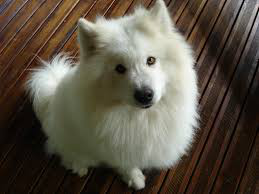

In [3]:
image

In [ ]:
# PIL image 객체를 array로 바꾸기
image_array = np.array(image)
# image_array = img_to_array(image)    # 위와 동일
image_array.shape

(194, 259, 3)

In [ ]:
# 0번축 추가: shape 변경
sample = image_array[np.newaxis, ...]               # 0번축 하나 추가
# sample = np.expand_dims(image_array, axis=0)      # 위와 동일
sample.shape

(1, 194, 259, 3)

(3) `ImageDataGenerator()`를 이용하여 영상 변형을 정의

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 증강 규칙 설정
datagen = ImageDataGenerator(
    rescale=1./255,                     # 픽셀 값을 0~1 범위로 정규화
    rotation_range=90,                  # ±90도 범위 내에서 회전
    brightness_range=[0.8, 1.0],        # 밝기 80%~100% 조정
    width_shift_range=0.2,              # 가로 방향 최대 20% 이동 [0.8, 1.2]
    height_shift_range=0.2,             # 세로 방향 최대 20% 이동
    zoom_range=[0.8, 1.2],              # 80%~120% 확대/축소

    shear_range=0.2,                    # 시어링(기울이기) 변환
    horizontal_flip=True,               # 좌우 반전
    # vertical_flip=True,               # 상하 반전
    fill_mode='nearest',                # 이동/회전 후 생긴 빈 픽셀 채우는 방식
)

(4) `ImageDataGenerator` 객체에 데이터를 할당해서 제너레이터 객체를 얻는다

In [8]:
# 이미지 하나만 변형 (flow) vs flow_from_directory
obj = datagen.flow(sample, batch_size=1)

(5) 증강하여 이미지를 생성한다

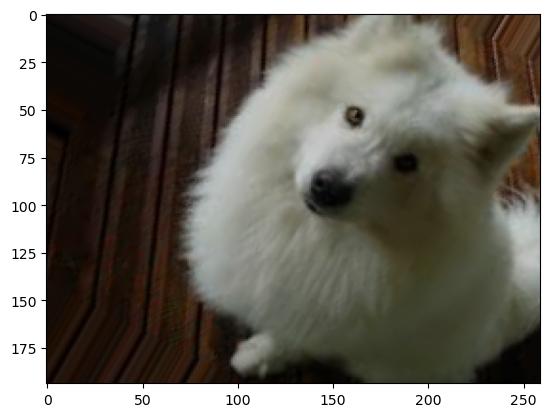

In [22]:
plt.imshow(next(obj)[0])

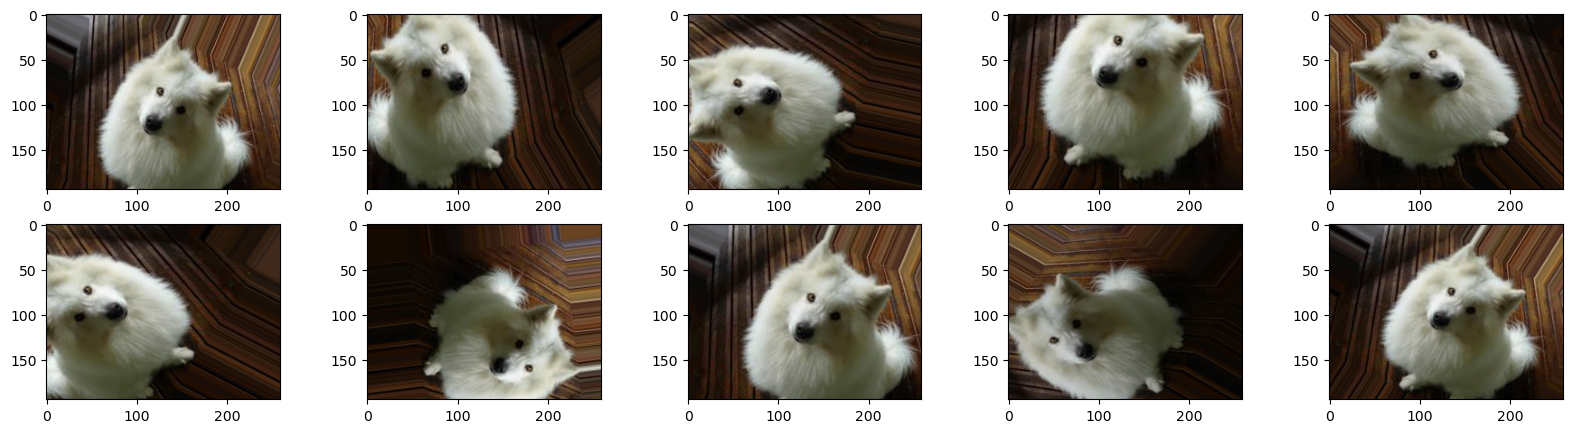

In [ ]:
fig = plt.figure(figsize=(20,5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    # image = obj.next()
    image = next(obj)
    plt.imshow(image[0])            # shape: (1, 194, 259, 3) -> (194, 254, 3) 

plt.show()

In [24]:
# 제너레이터 객체
for img in obj:
    break

img.shape

(1, 194, 259, 3)

### 06 예제: 강아지와 고양이 구별하기 (p487)

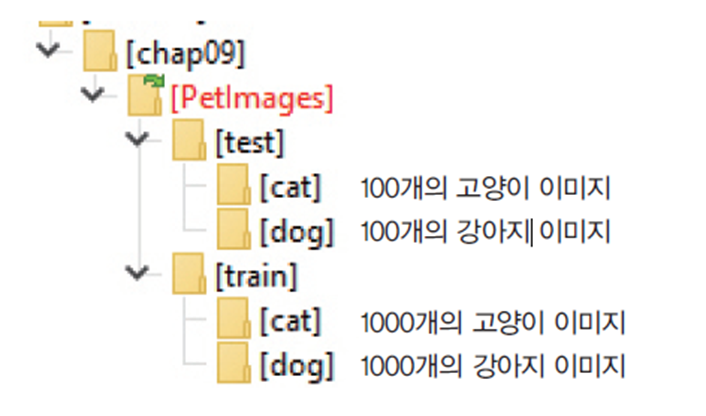

(1) 이미지 출력해 보기

(433, 500, 3)


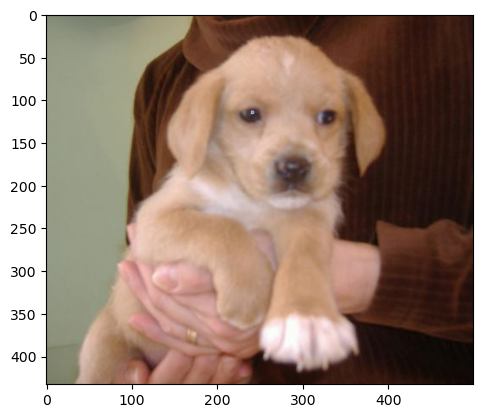

In [29]:
import matplotlib.pyplot as plt
image = plt.imread('PetImages/train/dog/103.jpg')
plt.imshow(image)
print(image.shape)
plt.show()

(2) 신경망 모델 생성

In [32]:
from tensorflow.keras import models, layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

train_dir = './Petimages/train'
test_dir = './Petimages/test'

model = models.Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))                   # 2진 분류

model.summary()

"""
from tensorflow.keras import models, layers

train_dir = './Petimages/train'
test_dir = './Petimages/test'

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))   # 2진 분류

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()
"""

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    29,491,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,511,617 (112.58 MB)

 Trainable params: 29,511,617 (112.58 MB)

 Non-trainable params: 0 (0.00 B)

"\nfrom tensorflow.keras import models, layers\n\ntrain_dir = './Petimages/train'\ntest_dir = './Petimages/test'\n\nmodel = models.Sequential()\nmodel.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(128,128,3)))\nmodel.add(layers.MaxPooling2D(2,2))\nmodel.add(layers.Conv2D(64,(3,3), activation='relu'))\nmodel.add(layers.MaxPooling2D(2,2))\nmodel.add(layers.Flatten())\nmodel.add(layers.Dense(units=512, activation='relu'))\nmodel.add(layers.Dense(1, activation='sigmoid'))   # 2진 분류\n\nmodel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])\nmodel.summary()\n"

In [33]:
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',     # 2진분류: binary_crossentropy, 다중분류: categorical_crossentropy
              metrics = ['accuracy'])

(3) 이미지 전처리
- 데이터 증강 옵션 설정

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 학습데이터 증강 옵션 설정
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
)

# 테스트 데이터는 변형이 필요 없으므로 rescaling만 지정
test_datagen = ImageDataGenerator(
    rescale=1./255
)

* 이미지 폴더를 지정하여 제너레이터 객체 생성

In [37]:
train_dir, test_dir

('./Petimages/train', './Petimages/test')

In [38]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),             # 이미지를 지정한 크기로 resize
    batch_size=20,                      # 한번에 생성할 데이터의 수
    class_mode='binary'                 # 2진분류(binary), 다중분류-원핫: categorical, 다중-정수: sparse
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


(4) 학습수행
- 콜백함수 정의

In [39]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 1) 콜백 정의
checkpointer = ModelCheckpoint(
    filepath="cat_and_dog_model.keras",     # 전체 모델 저장(권장 포맷)
    monitor="val_loss",                     # 검증 손실 기준
    save_best_only=True,                    # 성능이 향상될 때만 덮어쓰기
    verbose=1
)

early_stopping = EarlyStopping(
    monitor="val_loss",                     # 검증 손실 기준
    patience=3,                             # 개선 없으면 3 epoch 후 중단
    restore_best_weights=True,              # 최적 가중치로 복원
    verbose=1
)

- 학습

In [43]:
history = model.fit(
    train_generator,                            # 학습 데이터 제너레이터 (2000장 이미지, 2개 클래스, batch_size=20)
    steps_per_epoch=100,                        # 데이터 수(2000) / 배치 크기(20) = 100 -> 총 2000장/epochs 학습
    epochs=100,
    validation_data=test_generator,
    validation_steps=10,                         # 테스트데이터수 200 / 배치크기 20 = 10
    callbacks=[checkpointer, early_stopping]
)

c:\Users\admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 752ms/step - accuracy: 0.5361 - loss: 1.1588
Epoch 1: val_loss improved from None to 0.68187, saving model to cat_and_dog_model.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 89s 862ms/step - accuracy: 0.5615 - loss: 0.8010 - val_accuracy: 0.5450 - val_loss: 0.6819
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.5951 - loss: 0.6728
Epoch 2: val_loss improved from 0.68187 to 0.65282, saving model to cat_and_dog_model.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 55s 545ms/step - accuracy: 0.6020 - loss: 0.6628 - val_accuracy: 0.6450 - val_loss: 0.6528
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 548ms/step - accuracy: 0.6399 - loss: 0.6258
Epoch 3: val_loss improved from 0.65282 to 0.63019, saving model to cat_and_dog_model.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 61s 607ms/step - accuracy: 0.6460 - loss: 0.6300 - val_accuracy: 0.6350 - val_loss: 0.6302
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 583ms/step - accuracy: 0.6716 - loss: 0.6065
Epoch 4: va

(5) 학습 과정 시각화

In [ ]:
import pandas as pd

df_history = pd.DataFrame(history.history)
df_history[['accuracy', 'val_accuracy']].plot()
plt.show()

df_history[['loss', 'val_loss']].plot()
plt.show()

(6) 생성된 모델을 활용하여 새로운 이미지로 예측하기

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# 개인지 고양이인지 확인해보기
# 이미지 불러오기 (학습과 동일한 target_size)
img = load_img("dog.jpg", target_size=(128, 128))   # size를 지정하여 이미지 읽기
img_array = img_to_array(img)                       # (128,128,3)
img_array = img_array / 255.0                       # rescale과 동일하게 정규화 (0 ~ 1로)
img_array = img_array[np.newaxis, ...]              # (1,128,128,3)

# 예측
pred = model.predict(img_array)
print(pred)